## Step 1: Importing Libraries
We'll use Pandas, NumPy, Matplotlib and Seaborn for data analysis and visualization.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

## Step 2: Load the Titanic Dataset
We'll read the Titanic dataset (train.csv) and look at the first few rows.


In [9]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## checking the list of files


In [10]:
import os 
print(os.listdir())

['.ipynb_checkpoints', 'Titanic_Analysis.ipynb', 'train.csv', 'untitled.txt']


## Step 3: Understand the Data
We'll check the size, datatypes, basic stats, and missing values in the dataset.


In [11]:
df.shape

(891, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Step 4: Survival Based on Gender
Let's see how survival varied across male and female passengers.


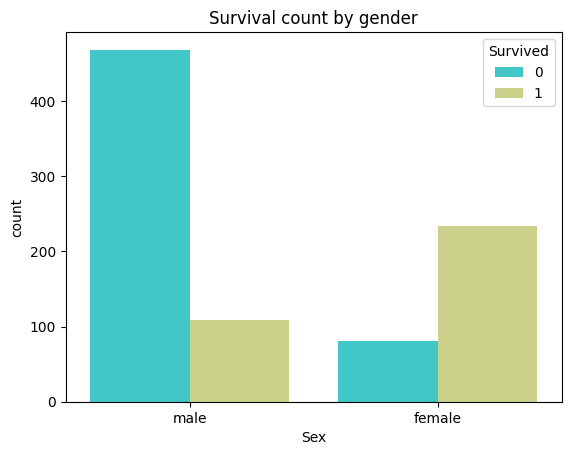

In [17]:
sns.countplot(data=df, x='Sex', hue= 'Survived', palette ='rainbow')
plt.title("Survival count by gender")
plt.show()

## Class vs Survival

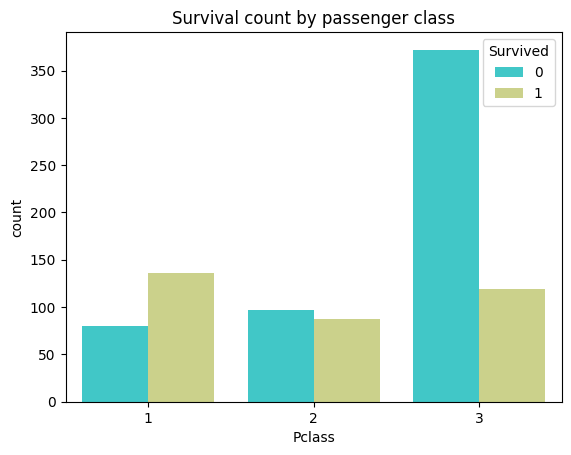

In [18]:
sns.countplot(data=df,x ='Pclass', hue='Survived', palette ='rainbow')
plt.title("Survival count by passenger class")
plt.show()

## Data Cleaning

In [30]:
df = pd.read_csv("train.csv")

# Only if Age column exists and has values
if 'Age' in df.columns:
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    if df['Age'].isnull().sum() > 0:
        df['Age'] = df['Age'].fillna(df['Age'].median())


## Age Distribution

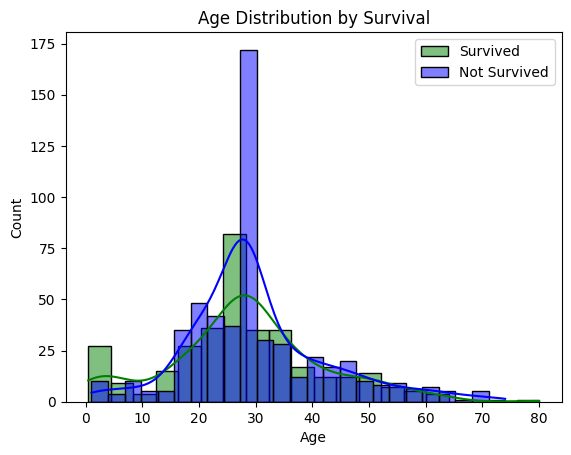

In [31]:
sns.histplot(df[df['Survived']==1]['Age'], label='Survived', kde=True, color='green')
sns.histplot(df[df['Survived']==0]['Age'], label='Not Survived', kde=True, color='blue')
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()

## Add Family Size 

In [39]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<Axes: xlabel='FamilySize', ylabel='count'>

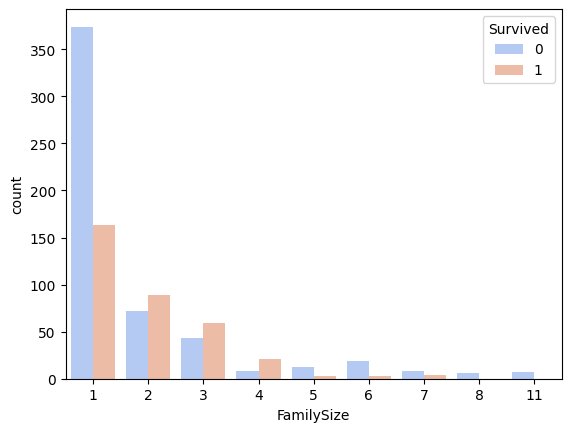

In [42]:
sns.countplot(x='FamilySize', hue='Survived', data=df, palette ='coolwarm')

## Correlation Heatmap

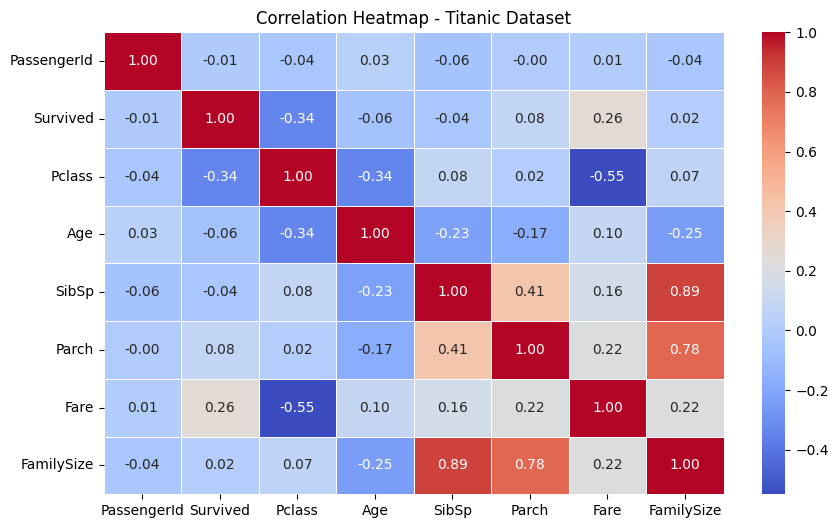

In [43]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()